In [1]:
df=pd.read_excel("E:\HTL Project\Dataset 4.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Moisture,Volatile,Ash,Temp,Time,Pressure,HHV,ERR,Yield%
0,11.8,67.0,8.6,300,30,130,35.2,37.2,36.0
1,3.9,67.4,24.4,350,60,180,37.9,42.7,43.0
2,5.8,67.3,9.5,250,60,100,33.8,33.0,33.0
3,8.5,61.6,18.5,250,30,100,34.8,41.5,24.7
4,4.9,54.4,13.5,375,50,221,36.0,64.8,55.3


In [2]:
df['Moisture']=df['Moisture'].fillna(df['Moisture'].mode()[0])
df['Volatile']=df['Volatile'].fillna(df['Volatile'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])

In [10]:
x=df.drop('ERR',axis=1)
y=df['ERR']
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(x_train, y_train)
y_pred =regressor.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
regressor2 = RandomForestRegressor(n_estimators = 10)
regressor2.fit(x_train, y_train)
y_pred1 =regressor2.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  4.0465


<IPython.core.display.Javascript object>

Root mean square error:  1.0312402500000002
R2 square:  0.5099812184749829


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  2.769875


<IPython.core.display.Javascript object>

Root mean square error:  0.5318663350694455
R2 square:  0.8610289943840281


In [11]:
params = {
    'max_depth': [2,3,5,10,20],
    'n_estimators': [10,25,30,50,50,100,200]
}

In [12]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=regressor,
                           param_grid=params)

In [13]:
rf_grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=10),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'n_estimators': [10, 25, 30, 50, 50, 100, 200]})

In [14]:
rf_grid.best_params_

{'max_depth': 20, 'n_estimators': 50}

In [15]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
45,24.6,24.59
75,17.7,17.25
1,42.7,26.24
90,38.0,46.91
19,50.3,26.47


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

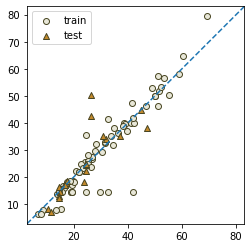

In [17]:
fig, ax = plt.subplots()
ax.scatter(y_pred1,y_train,label='train',color='#e8e7d8',edgecolors='#494623')
ax.scatter(y_pred,y_test,label='test',color='#c3892b',marker ="^",edgecolors='#494623')
#ax.xlabel('Actual Values of HHV',fontsize=14)
#ax.ylabel('Predicted Values of HHV',fontsize=14)
ax.legend()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, '--')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
fig.savefig('/Users/Rishi Chaitanya/Desktop/RF ERR 4.png', dpi=300)